In [68]:
import os
import numpy as np
import librosa 
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd


In [69]:

deb = "../dataset/recordings/0_george_0.wav" 
deb2 = "../dataset/recordings/2_theo_47.wav"
sig, rate = librosa.load(deb)
sig2, rate2 = librosa.load(deb2)
print(sig.shape, sig2.shape)

(6571,) (4697,)


In [96]:
# training/test data split
path = "../dataset/recordings"
if not os.path.exists('../dataset/digitalize'):
    os.mkdir('../dataset/digitalize')
sizes = []
for sample in os.listdir(path):
    sig,rate = librosa.load(path + "/" + sample)

    sizes.append((len(sig), sample))
    
    


3_lucas_41
0_jackson_6
3_george_17
2_theo_11
0_yweweler_37
6_lucas_20
5_lucas_31
7_jackson_10
7_george_26
7_george_0
8_lucas_30
4_nicolas_35
0_lucas_49
3_yweweler_23
2_theo_25
4_yweweler_8
5_jackson_21
2_lucas_23
6_yweweler_36
9_jackson_0
9_yweweler_19
0_yweweler_28
0_yweweler_44
1_theo_4
9_yweweler_4
8_lucas_19
0_yweweler_0
8_nicolas_17
3_theo_35
3_jackson_34
2_lucas_2
2_george_38
3_nicolas_23
3_yweweler_1
4_lucas_19
0_theo_15
6_yweweler_47
3_george_40
6_theo_33
4_yweweler_0
5_yweweler_31
3_george_12
7_lucas_34
3_theo_41
5_yweweler_37
6_george_6
5_theo_48
7_george_20
1_nicolas_15
1_george_16
5_lucas_37
6_yweweler_2
0_yweweler_33
4_theo_16
3_nicolas_20
5_lucas_11
0_theo_35
8_jackson_35
6_george_41
0_lucas_18
8_lucas_26
2_lucas_37
3_yweweler_0
4_theo_20
7_yweweler_8
7_yweweler_2
9_jackson_3
1_theo_26
9_jackson_28
7_yweweler_30
9_yweweler_15
6_lucas_9
6_lucas_13
9_theo_9
1_george_18
9_george_12
0_theo_20
2_theo_14
0_lucas_47
2_theo_47
0_george_34
1_george_25
9_theo_20
8_jackson_18
9_theo

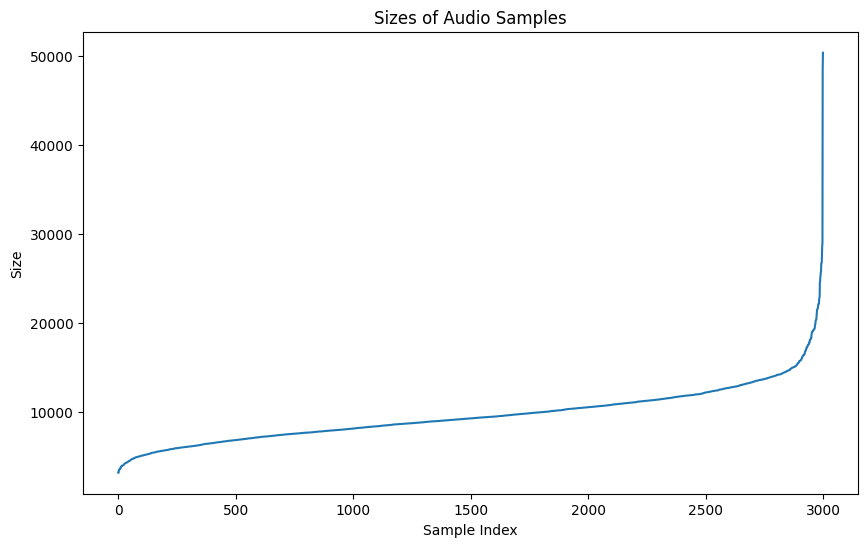

In [71]:
plt.figure(figsize=(10, 6))
sizes.sort(key=lambda x: x[0])
sizes_only = [size[0] for size in sizes]
plt.plot(sizes_only)
plt.title('Sizes of Audio Samples')
plt.xlabel('Sample Index')
plt.ylabel('Size')
plt.show()

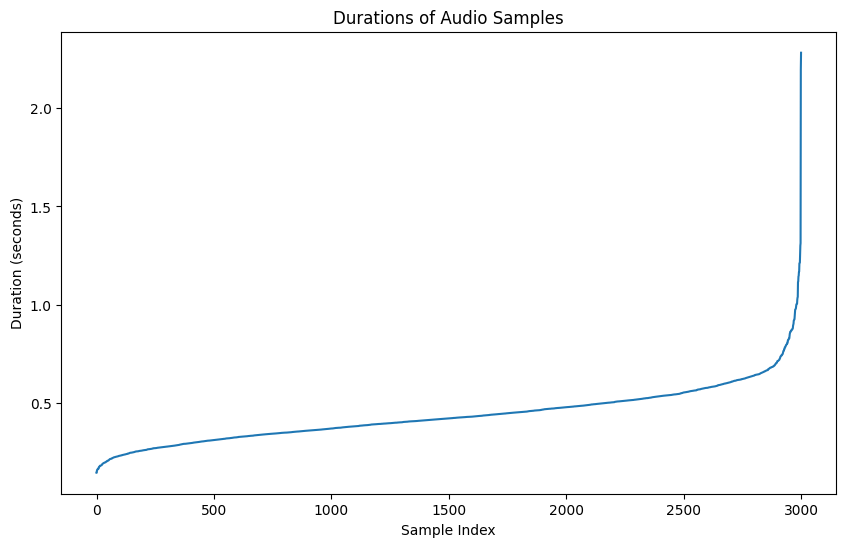

In [72]:
# Calculate the duration of each sample
sr = 22050 #follows nyqusit
durations = [size / sr for size in sizes_only]

# Plot the durations
plt.figure(figsize=(10, 6))
plt.plot(durations)
plt.title('Durations of Audio Samples')
plt.xlabel('Sample Index')
plt.ylabel('Duration (seconds)')
plt.show()

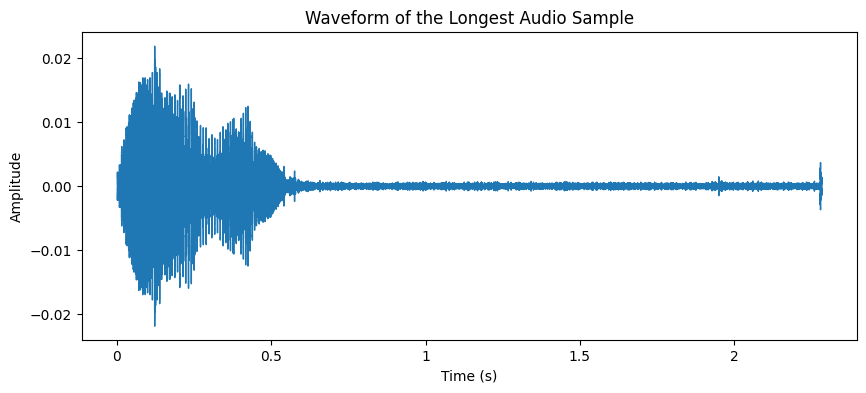

sampling rate: 22050 sample size: 50335


In [73]:
sizes[-1]
long_aud = path + "/" + sizes[-1][1]
long_aud

longSig, sr = librosa.load(long_aud)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(longSig[:int(len(longSig))], sr=sr)
plt.title('Waveform of the Longest Audio Sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
print("sampling rate:", sr, "sample size:", len(longSig))

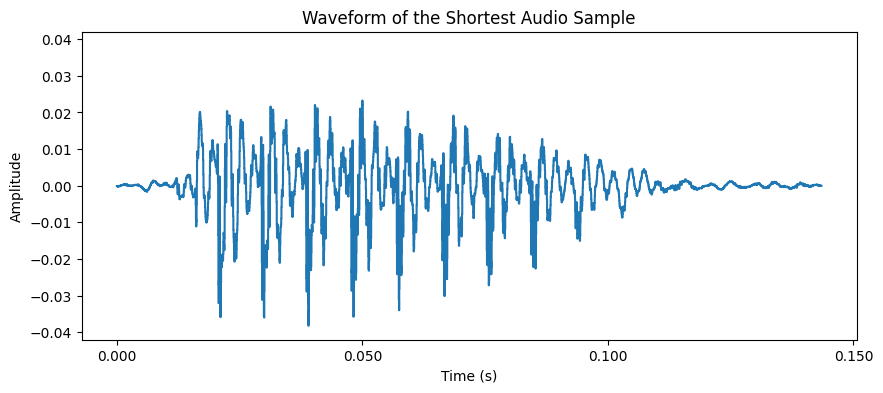

In [74]:
sizes[0]
shortest_aid = path + "/" + sizes[0][1]
ipd.Audio(shortest_aid)
shortestSig, sr = librosa.load(shortest_aid)
plt.figure(figsize=(10, 4))
librosa.display.waveshow(shortestSig, sr=sr)
plt.title('Waveform of the Shortest Audio Sample')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [75]:
FRAME_SIZE = 2048
HOP_SIZE = 512

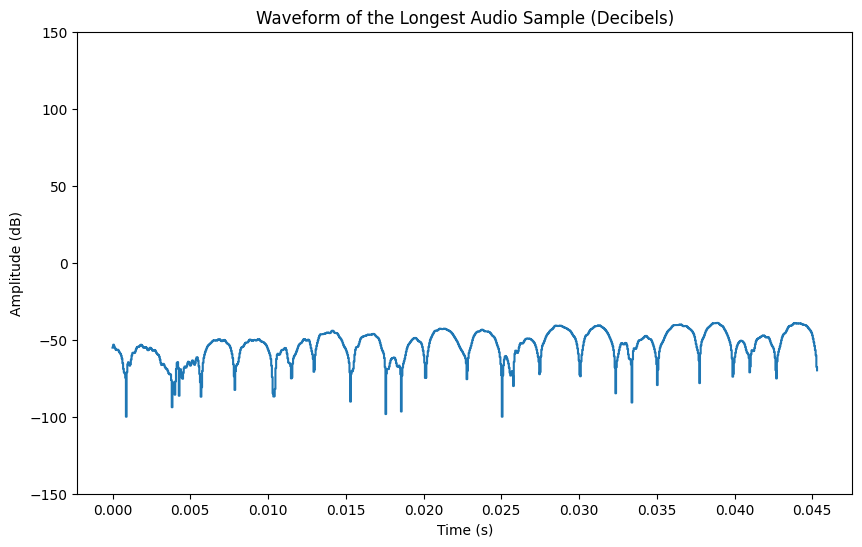

In [76]:
db_longSig = librosa.amplitude_to_db(longSig[0:1000])

plt.figure(figsize=(10, 6))
plt.ylim(-150, 150)
librosa.display.waveshow(db_longSig, sr=sr)
plt.title('Waveform of the Longest Audio Sample (Decibels)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')
plt.show()

In [77]:
# cropping quietness
ipd.Audio(long_aud)

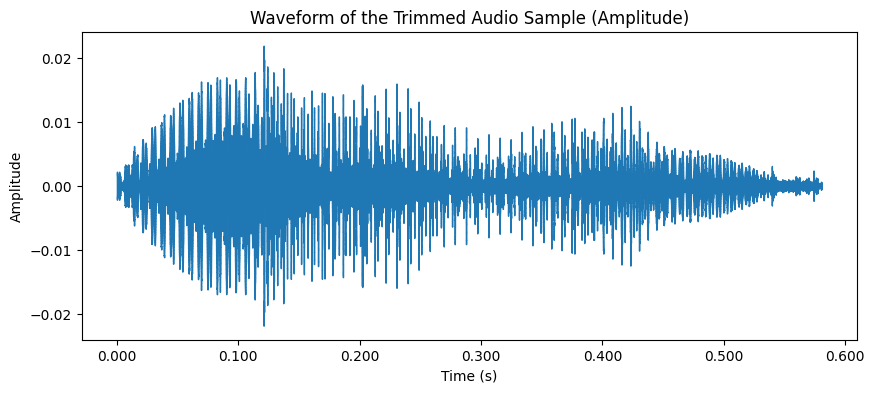

In [78]:

# after crop
trimmed_audio, _ = librosa.effects.trim(longSig, top_db=20)
# Plot the waveform using amplitude
plt.figure(figsize=(10, 4))
librosa.display.waveshow(trimmed_audio, sr=sr)
plt.title('Waveform of the Trimmed Audio Sample (Amplitude)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [79]:
ipd.Audio(trimmed_audio, rate=sr)

In [80]:
trimmed_audio.shape, longSig.shape

((12800,), (50335,))

In [139]:
# load all using 20 as the filter
cropped_sizes = []
for sample in os.listdir(path):
    sig,rate = librosa.load(path + "/" + sample)
    sig,_ = librosa.effects.trim(sig, top_db=30)
    cropped_sizes.append((len(sig), sample))

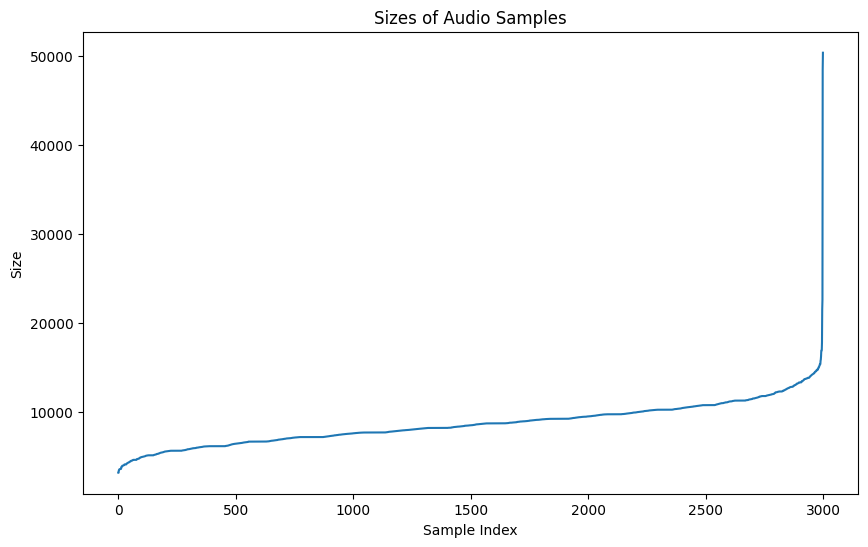

In [140]:
plt.figure(figsize=(10, 6))
cropped_sizes_only = [size[0] for size in cropped_sizes]
cropped_sizes_only.sort()
plt.plot(cropped_sizes_only)
plt.title('Sizes of Audio Samples')
plt.xlabel('Sample Index')
plt.ylabel('Size')
plt.show()

In [141]:
max(cropped_sizes), min(cropped_sizes)

((50335, '9_theo_16.wav'), (3165, '6_yweweler_3.wav'))

In [129]:
max_audio_path = path + "/" + min(cropped_sizes)[1]
max_audio_sig, _ = librosa.load(max_audio_path)
ipd.Audio(max_audio_sig, rate=sr)


In [147]:
x = np.zeros((3000, 40, 99))

x.shape[0]

3000